In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS", "DejaVu Sans"]
plt.rcParams["axes.unicode_minus"] = False

In [70]:
DATA_PATH = r"C:\Users\Nhuan\OneDrive - ut.edu.vn\Desktop\SEMESTER_7\DATA MINING\hotel-room-classification-pipeline\integration\unified\unified_hotels_rooms.csv"

df = pd.read_csv(DATA_PATH)
df.head()

,source,hotel_id,hotel_name,hotel_url,city,address,latitude,longitude,stars,rating,...,area_m2,max_occupancy,price_original,price_final,discount_pct,free_cancel,breakfast,amenities,checkin_date,checkout_date
0,hoangvu,NaN,*BOM HOMES* VINHOMES CENTRAL PARK- LUXURY APAR...,https://www.booking.com/hotel/vn/bom-homes-vin...,Ho Chi Minh,"Quận Bình Thạnh, TP. Hồ Chí Minh (Hàng Xanh)",NaN,NaN,0.0,1.3,...,60.0,1.0,9720000,9720000,0.0,1.0,0.0,"căn hộ 1 phòng ngủ, căn hộ nguyên căn, 60 m², ...",01/01/2026,NaN
1,hoangvu,NaN,*BOM HOMES* VINHOMES CENTRAL PARK- LUXURY APAR...,https://www.booking.com/hotel/vn/bom-homes-vin...,Ho Chi Minh,"Quận Bình Thạnh, TP. Hồ Chí Minh (Hàng Xanh)",NaN,NaN,0.0,1.3,...,85.0,5.0,10260000,10260000,0.0,1.0,0.0,"căn hộ 2 phòng ngủ, căn hộ nguyên căn, 85 m², ...",01/01/2026,NaN
2,hoangvu,NaN,*BOM HOMES* VINHOMES CENTRAL PARK- LUXURY APAR...,https://www.booking.com/hotel/vn/bom-homes-vin...,Ho Chi Minh,"Quận Bình Thạnh, TP. Hồ Chí Minh (Hàng Xanh)",NaN,NaN,0.0,1.3,...,60.0,7.0,19980000,19980000,0.0,1.0,0.0,"căn hộ 1 phòng ngủ, căn hộ nguyên căn, 60 m², ...",01/01/2026,NaN
3,hoangvu,NaN,1 AM Home Sai Gon,https://www.booking.com/hotel/vn/1-am-homestay...,Ho Chi Minh,"Quận 3, TP. Hồ Chí Minh",NaN,NaN,0.0,0.0,...,13.0,1.0,1539000,1539000,0.0,0.0,0.0,"phòng có giường cỡ queen, wifi miễn phí, điều ...",01/01/2026,NaN
4,hoangvu,NaN,1 AM Home Sai Gon,https://www.booking.com/hotel/vn/1-am-homestay...,Ho Chi Minh,"Quận 3, TP. Hồ Chí Minh",NaN,NaN,0.0,0.0,...,13.0,2.0,1620000,1620000,0.0,0.0,0.0,"phòng có giường cỡ queen, wifi miễn phí, điều ...",01/01/2026,NaN


In [71]:
price = df["price_final"].dropna()
price = price[price > 0]

plt.hist(price, bins=50, edgecolor="black")
plt.title("Phân phối giá phòng (price_final)")
plt.xlabel("VND")
plt.ylabel("Số lượng")
plt.show()


TypeError: '>' not supported between instances of 'str' and 'int'

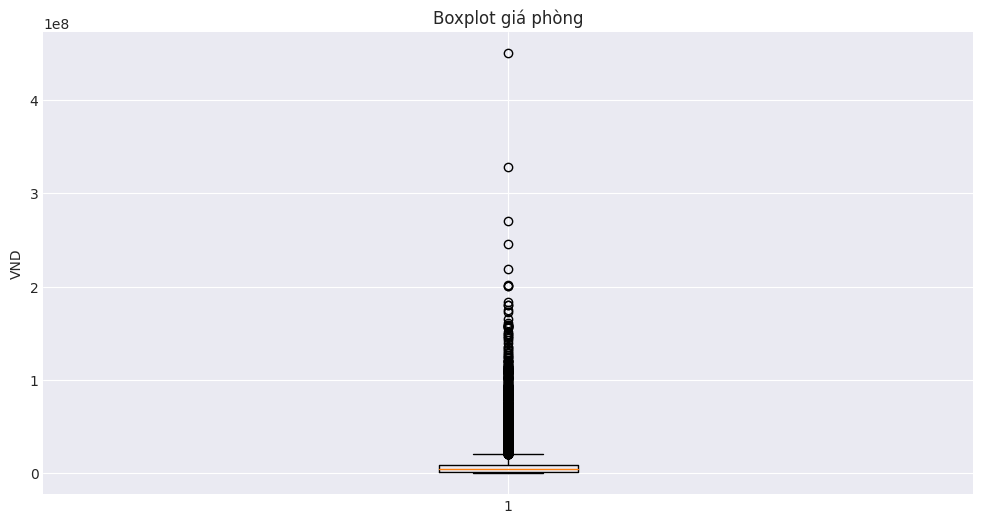

(8960936.226603206, 4064300.0)

In [ ]:
plt.boxplot(price, vert=True)
plt.title("Boxplot giá phòng")
plt.ylabel("VND")
plt.show()

price.mean(), price.median()


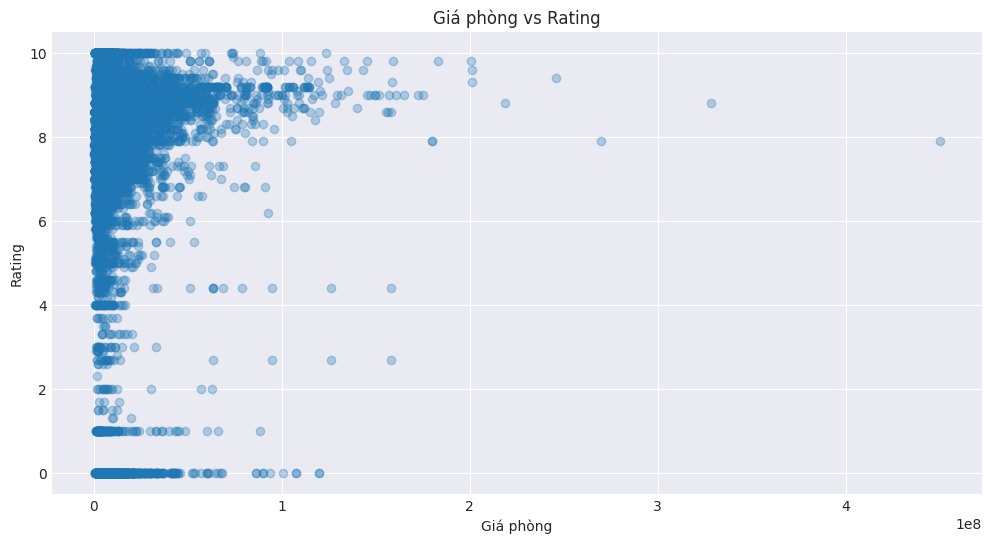

0.06429996765051639

In [ ]:
valid = df[["price_final", "rating"]].dropna()
valid = valid[(valid["price_final"] > 0) & (valid["rating"] <= 10)]

plt.scatter(valid["price_final"], valid["rating"], alpha=0.3)
plt.xlabel("Giá phòng")
plt.ylabel("Rating")
plt.title("Giá phòng vs Rating")
plt.show()

valid["price_final"].corr(valid["rating"])


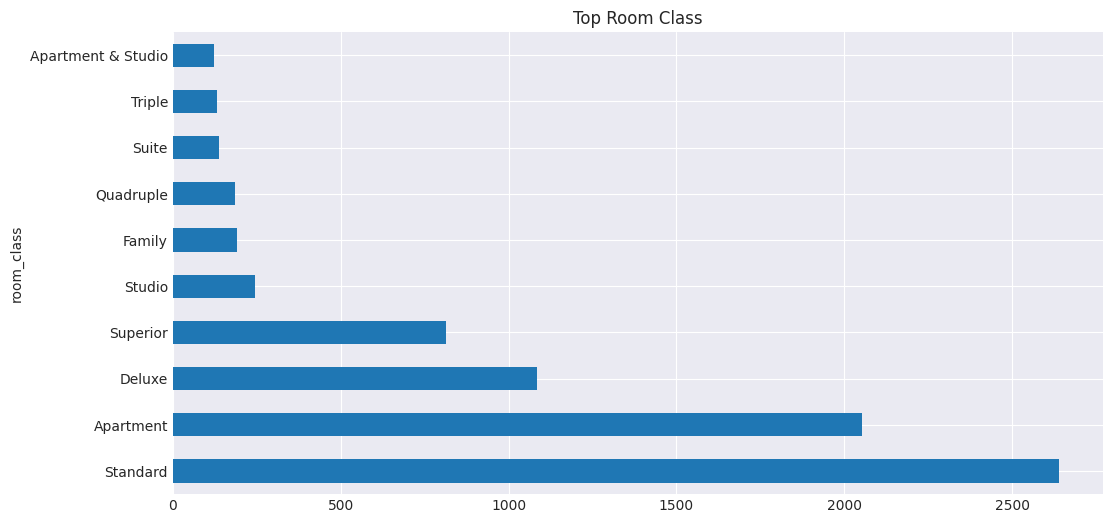

In [ ]:
df["room_class"].value_counts().head(10)
df["room_class"].value_counts().head(10).plot(kind="barh")
plt.title("Top Room Class")
plt.show()

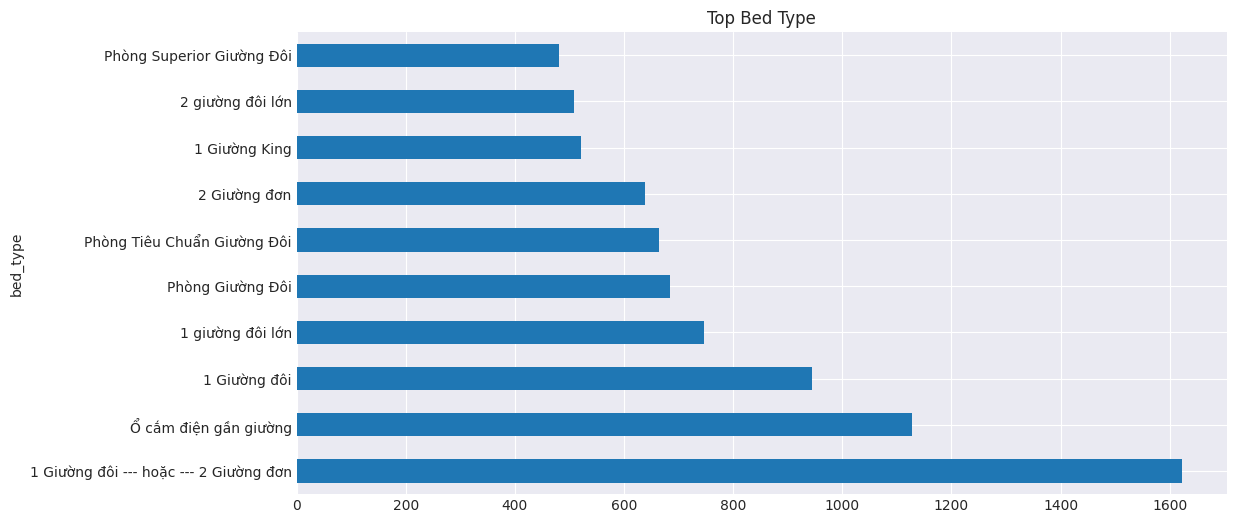

In [ ]:
df["bed_type"].value_counts().head(10).plot(kind="barh")
plt.title("Top Bed Type")
plt.show()

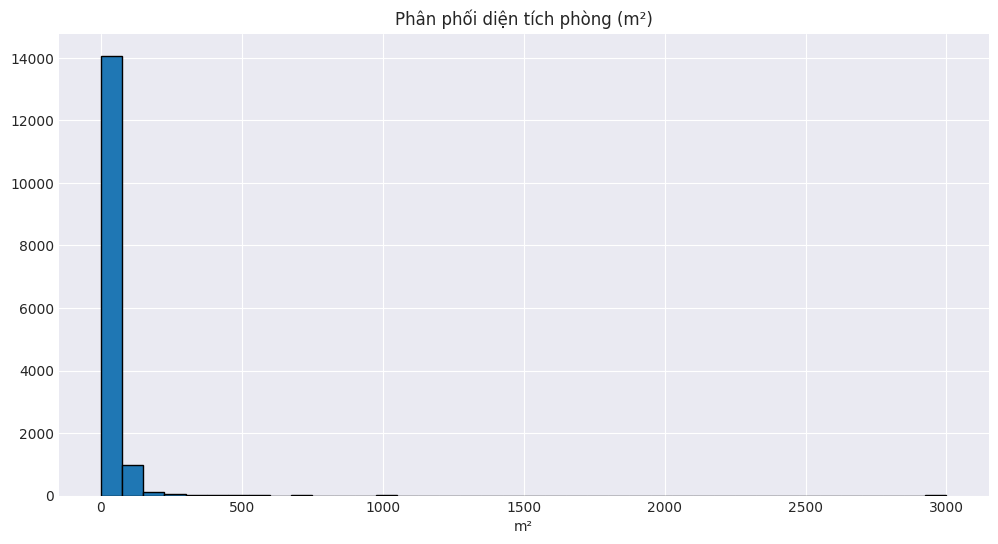

In [ ]:
area_df = df[["area_m2", "price_final"]].dropna()
area_df = area_df[(area_df["area_m2"] > 0) & (area_df["price_final"] > 0)]

plt.hist(area_df["area_m2"], bins=40, edgecolor="black")
plt.title("Phân phối diện tích phòng (m²)")
plt.xlabel("m²")
plt.show()

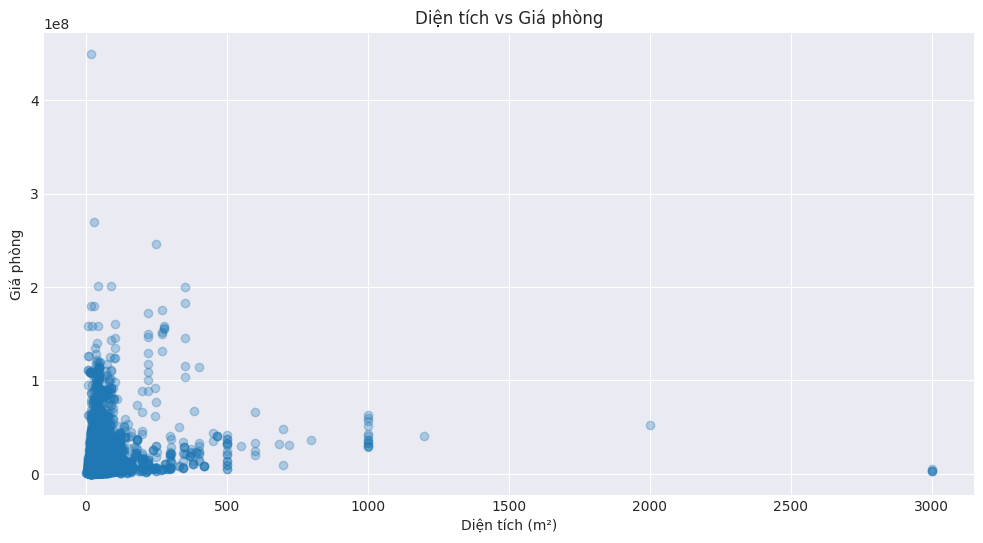

In [ ]:
plt.scatter(area_df["area_m2"], area_df["price_final"], alpha=0.3)
plt.xlabel("Diện tích (m²)")
plt.ylabel("Giá phòng")
plt.title("Diện tích vs Giá phòng")
plt.show()

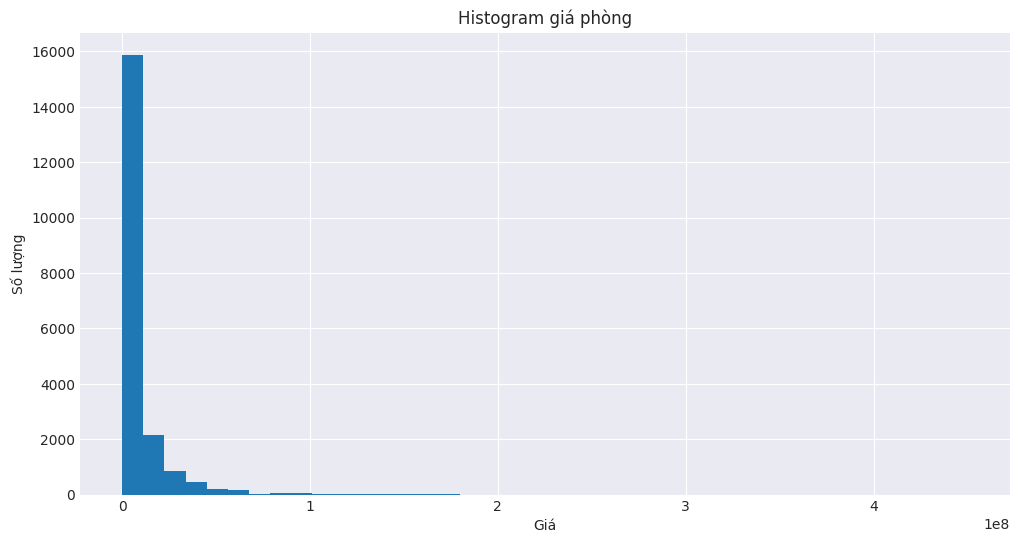

In [ ]:
plt.hist(df["price_final"].dropna(), bins=40)
plt.title("Histogram giá phòng")
plt.xlabel("Giá")
plt.ylabel("Số lượng")
plt.show()


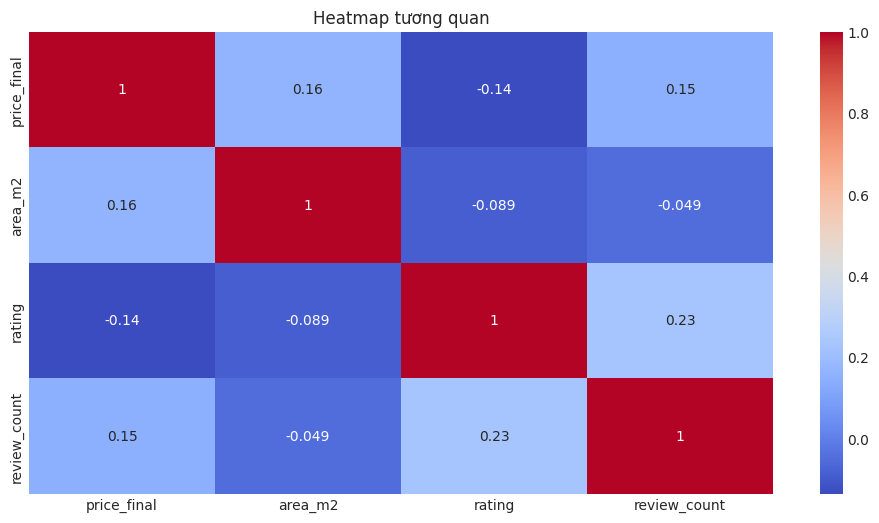

In [ ]:
corr = df[
    ["price_final", "area_m2", "rating", "review_count"]
].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap tương quan")
plt.show()
